In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt

In [2]:

def rotation_matrix_arbitrary_axis(axis, angle):
    """
    Returns a 3D rotation matrix for rotating around an arbitrary axis by a given angle (in radians).
    
    :param axis: A 3D unit vector representing the axis of rotation (array-like or list).
    :param angle: The angle in radians by which to rotate.
    :return: A 3x3 rotation matrix.
    """
    axis = np.array(axis)
    axis = axis / np.linalg.norm(axis)  # Ensure the axis is a unit vector
    
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    one_minus_cos = 1 - cos_theta
    
    # Skew-symmetric matrix of the axis
    K = np.array([
        [0, -axis[2], axis[1]],
        [axis[2], 0, -axis[0]],
        [-axis[1], axis[0], 0]
    ])
    
    # Outer product of the axis
    outer_product = np.outer(axis, axis)
    
    # Rotation matrix using Rodrigues' formula
    R = cos_theta * np.eye(3) + one_minus_cos * outer_product + sin_theta * K
    
    return R

def rotate_vector_arbitrary_axis(vector, axis, angle):
    """
    Rotates a 3D vector around an arbitrary axis by a given angle (in radians).
    
    :param vector: A 3D vector to rotate (as a list or numpy array).
    :param axis: A 3D unit vector representing the axis of rotation.
    :param angle: The angle in radians by which to rotate the vector.
    :return: The rotated 3D vector.
    """
    rot_matrix = rotation_matrix_arbitrary_axis(axis, angle)
    rotated_vector = np.dot(rot_matrix, vector)
    return rotated_vector

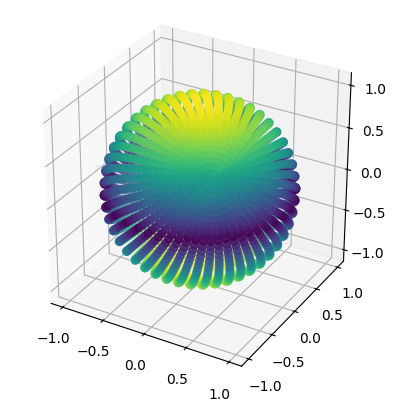

In [5]:
# Ball:
# rotate pointset
cm = plt.get_cmap("RdYlGn")


# make random axis ang angle 
import random

r_axis = np.asarray([np.float32(random.uniform(0,1)), np.float32(random.uniform(0,1)), np.float32(random.uniform(0,1))])
r_angle = random.uniform(0,1.5708)
res = 50

# Make data
phis = np.linspace(0, 2 * np.pi, res)
thetas = np.linspace(0, np.pi, res)
x,y,z,col = np.empty((0)), np.empty((0)),np.empty((0)), np.empty((0))

for phi in phis:
    for theta in thetas:
        x =  np.append(x,np.cos(phi)*np.sin(theta))
        y =  np.append(y,np.sin(phi)*np.sin(theta))
        z =  np.append(z,np.cos(theta))

# rotate and stack the points
points = np.vstack((np.vstack((x,y)),z))
rot_mat = rotation_matrix_arbitrary_axis(r_axis, r_angle)
points = rot_mat@points[:,:]

# # now evaluate points according to z-value 

for point in points.T:
        col = np.append(col,np.abs( point[2]))


# now stack
points = np.vstack((points,col))

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(points[0,:], points[1,:], points[2,:], s=30, c=points[3,:], marker='o')                                                                                
ax3D.set_aspect('equal')

plt.show()  

In [6]:
import math
for j,point_j in enumerate(points.T):
    for i,point_i in enumerate(points.T):
        if (math.isclose(point_i[3], point_j[3])):
            print(j, i)
        #print(point_i[3]-point_j[3])

0 0
0 49
0 50
0 99
0 100
0 149
0 150
0 199
0 200
0 249
0 250
0 299
0 300
0 349
0 350
0 399
0 400
0 449
0 450
0 499
0 500
0 549
0 550
0 599
0 600
0 649
0 650
0 699
0 700
0 749
0 750
0 799
0 800
0 849
0 850
0 899
0 900
0 949
0 950
0 999
0 1000
0 1049
0 1050
0 1099
0 1100
0 1149
0 1150
0 1199
0 1200
0 1249
0 1250
0 1299
0 1300
0 1349
0 1350
0 1399
0 1400
0 1449
0 1450
0 1499
0 1500
0 1549
0 1550
0 1599
0 1600
0 1649
0 1650
0 1699
0 1700
0 1749
0 1750
0 1799
0 1800
0 1849
0 1850
0 1899
0 1900
0 1949
0 1950
0 1999
0 2000
0 2049
0 2050
0 2099
0 2100
0 2149
0 2150
0 2199
0 2200
0 2249
0 2250
0 2299
0 2300
0 2349
0 2350
0 2399
0 2400
0 2449
0 2450
0 2499
1 1
1 2451
2 2
2 2452
3 3
3 2453
4 4
4 2454
5 5
5 2455
6 6
6 2456
7 7
7 2457
8 8
8 2458
9 9
9 2459
10 10
10 2460
11 11
11 2461
12 12
12 2462
13 13
13 2463
14 14
14 2464
15 15
15 2465
16 16
16 2466
17 17
17 2467
18 18
18 2468
19 19
19 2469
20 20
20 2470
21 21
21 2471
22 22
22 2472
23 23
23 2473
24 24
24 2474
25 25
25 2475
26 26
26 2476
27 27
27